In [94]:
# Daniela Mata Camacho
# Ejercicio: 01-11-2025

print("========================EJERCICIO=================================")

print("Breast Cancer Wisconsin (Diagnóstico)")
print("\nDescripción: Contiene características calculadas a partir de una imagen digitalizada de un aspirado con aguja fina de una masa mamaria.\nClase a Predecir: El objetivo es predecir si el tumor es Maligno (M) o Benigno (B).\nEs un problema clásico de clasificación binaria.URL: https://raw.githubusercontent.com/datasets/breast-cancer-wisconsin/master/data/data.csv")


========================EJERCICIO=================================
Breast Cancer Wisconsin (Diagnóstico)

Descripción: Contiene características calculadas a partir de una imagen digitalizada de un aspirado con aguja fina de una masa mamaria.
Clase a Predecir: El objetivo es predecir si el tumor es Maligno (M) o Benigno (B).
Es un problema clásico de clasificación binaria.URL: https://raw.githubusercontent.com/datasets/breast-cancer-wisconsin/master/data/data.csv


In [ ]:
# Importacion de las librerias a implementar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.datasets import load_breast_cancer


In [96]:
# Paso 1: Carga y exploracion de Datos

# Para la clase diagnosis 0 = Maligno y 1 = Beningno
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

print("======================Data Breast Cancer Wisconsin================")
print(df.head())

======================Data Breast Cancer Wisconsin================
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension

In [97]:
# Paso 2: Verificacion de Datos Nulos

print("===== VERIFICACION DE VALORES NULOS =====")

print(f"\nTotal de Valores Nulos: {df.isnull().sum().sum()}")
print("\n Valores Nulos por Columna\n")
print(df.isnull().sum())

# En este caso, no se hallaron valores nulos dentro del CSV. por lo que no era necesario continuar con el siguiente paso
# de imputacion de datos.


===== VERIFICACION DE VALORES NULOS =====

Total de Valores Nulos: 0

 Valores Nulos por Columna

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dty

In [98]:
# Paso 3: Preprocesamiento de Datos / Clasificacion Binaria

print("\n===== CLASIFICACION BINARIA =====")

# variable 'diagnosis'

print("Distribucion de la variable objetivo: ")
print(df['diagnosis'].value_counts())
print(f"Proporcion de Clases {df['diagnosis'].value_counts(normalize=True)}")



===== CLASIFICACION BINARIA =====
Distribucion de la variable objetivo: 
diagnosis
1    357
0    212
Name: count, dtype: int64
Proporcion de Clases diagnosis
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [99]:
# Paso 4: Preparacion de Variables X / Y

print("===== PREPARACION DE VARIABLES X / Y ======")

# X = Todas las caracteristicas y Y = Variable Dependiente (Diagnosis)

features = [col for col in df if col != 'diagnosis']
x = df[features]
y = df['diagnosis']

print(f"Dimesiones de la variable 'x' = {x.shape}")
print(f"Dimesiones de la variable 'y' = {y.shape}")

===== PREPARACION DE VARIABLES X / Y ======
Dimesiones de la variable 'x' = (569, 30)
Dimesiones de la variable 'y' = (569,)


In [100]:
# Paso 5: Separacion de Variables Test y Train

print("===== SEPARACION TEST / TRAIN ======")

x_train, x_test, y_train, y_test = train_test_split(
    x ,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"\n-Entrenamiento: {x_train.shape[0]} muestras ({(x_train.shape[0]/len(x))*100:.1f}%)")
print(f"\n-Prueba: {x_test.shape} muestras ({(x_test.shape[0]/len(x))*100:.1f}%)")


===== SEPARACION TEST / TRAIN ======

-Entrenamiento: 426 muestras (74.9%)

-Prueba: (143, 30) muestras (25.1%)


In [101]:
# Paso 6: Escalamaiento de Datos

print("===== ESCALAMIENTO DE DATOS =====")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Calculo de algunas estadisticas despues del escalameinto

print("\nESTADISTICAS: ")
print(f"Media: {np.mean(x_train_scaled, axis= 0)[:3]}")
print(f"Desviacion Estandar: {np.std(x_train_scaled, axis=0)[:3]}")




===== ESCALAMIENTO DE DATOS =====

ESTADISTICAS: 
Media: [-4.68430719e-15  3.92226679e-16 -2.25693225e-15]
Desviacion Estandar: [1. 1. 1.]


In [102]:
# Paso 7: Entrenamiento del Modelo 

print("===== ENTRENAMIENTO DEL MODELO =====")
logreg = LogisticRegression(
    solver='liblinear',
    random_state=42,
    max_iter=1000
)

logreg.fit(x_train_scaled, y_train)

print(f"Coeficiente: {logreg.coef_.shape}")
print(f"Intercepto: {logreg.intercept_}")


===== ENTRENAMIENTO DEL MODELO =====
Coeficiente: (1, 30)
Intercepto: [0.22877022]


===== EVALUACION MODELO =====
METRICAS BASICAS

-Exactitud: 0.9860

-Matriz de Confusion:
[[52  1]
 [ 1 89]]


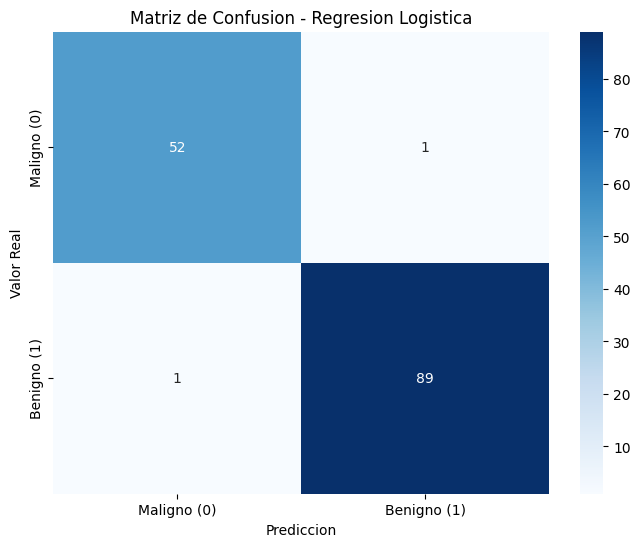

===== REPORTE DE CLASIFICACION =====
              precision    recall  f1-score   support

     Maligno       0.98      0.98      0.98        53
     Benigno       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


AUC = 0.9977


In [ ]:
# Paso 8: Prediccion y Evaluacion del Modelo.

print("===== EVALUACION MODELO =====")

y_pred = logreg.predict(x_test_scaled)
y_proba = logreg.predict_proba(x_test_scaled)[:, 1] # Probabilidad para la clase Benigno

# Metricas

print("METRICAS BASICAS")
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n-Exactitud: {accuracy:.4f}")
print("\n-Matriz de Confusion:")
print(cm)

# Visualizacion de la Matriz de Confusion en Grafico

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Maligno (0)', 'Benigno (1)'], 
            yticklabels=['Maligno (0)', 'Benigno (1)'])
plt.title('Matriz de Confusion de Regresion Logistica')
plt.ylabel('Valor Real')
plt.xlabel('Prediccion')
plt.show()

# Reporte de Clasificacion

print("===== REPORTE DE CLASIFICACION =====")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

# Calculo del auc
auc = roc_auc_score(y_test, y_proba)
print(f"\nAUC = {auc:.4f}")


In [ ]:
# Opte por utilizar este modelo, ya que fue uno de los que mejor comprendi en clases y se especializa en la 
# clasificacion entre variables con caracteristicas mutuamente excluyentes (clasificacion binaria). Dado lo
# requerido en el ejercicio, lo considere una buena opcion para crear un modelo que otorgara una predccion optima.

"""
Distribucion de las clases: Hay un desbalance entre los datos de ambas clases,
(Un 62.7% de tumores benignos para un 37.3% de tumores malignos) sin embargo esto
no afecta de forma significativa el modelo ya que se considera normal ese desbalance.

Matriz de Confusion: En la grafica se puede observar como en la correlacion se detecto
1 falso negativo frente a 52 en tumores malignos y 1 falso positivo frente a 89 tumores 
benignos.

Para la prediccion de tumores malignos, el 98% efectivamente lo eran. Y en el caso de los
tumores benignos, logro detectar el 99% de los tumores de forma efectiva.

AUC = El modelo tiene un total de 99.77% lo que indica que el modelo es bueno clasificando 
ambas clases de tumores, lo que puede dar buenos indicios o usarse como un apoyo para el
especialista en la deteccion de un tumor maligno.
"""

'\nDistribucion de las clases: Hay un desbalance entre los datos de ambas clases,\n(Un 62.7% de tumores benignos para un 37.3% de tumores malignos) sin embargo esto\nno afecta de forma significativa el modelo ya que se considera normal ese desbalance.\n\nMatriz de Confusion: En la grafica se puede observar como en la correlacion se detecto\nun falso negativo en tumores malignos \n'